##  Tools Setup 

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

##  Import datasets 
and visualize them to have a first impression of how to work on them to extract the needed columns

In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train

,w,y,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,1,0.483130,0.790980,0.702555,0.528220,0.298746,0.025488,-0.173480,-0.245290,-0.405057,...,0.954288,1.143901,1.359252,1.081061,1.364409,1.449354,1.195431,1.195992,1.165327,0.771110
1,1,1.135624,0.765286,0.604512,0.414197,0.241638,0.181862,-0.031920,-0.070617,-0.185980,...,0.561545,0.678086,0.848950,1.133852,1.041396,1.242806,1.248121,1.331348,1.267123,1.292718
2,1,0.686081,0.702834,0.637708,0.798416,0.755065,0.705225,0.535391,0.613129,0.549732,...,1.328694,1.324254,1.272889,1.074786,0.753950,0.539693,0.402041,0.442759,0.487557,0.699007
3,1,-1.342005,0.018378,-0.097297,-0.020850,-0.083325,-0.268512,-0.486335,-0.731130,-0.924458,...,-0.386676,-0.357946,-0.612069,-0.698063,-0.891789,-1.127624,-1.535678,-1.490786,-1.856840,-1.441472
4,1,-0.241418,0.463120,0.665307,0.446953,0.480780,0.392500,0.309231,0.158462,0.190963,...,-0.174944,-0.529541,-0.191921,-0.258093,-0.542403,-0.414866,-0.485580,-0.768820,-0.662573,-0.211837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,1,1.026517,1.002615,1.007519,0.990882,1.009554,1.009953,1.016928,0.980784,0.919103,...,1.003996,1.015111,1.014566,1.032765,1.035272,1.036289,1.027571,1.028043,1.032729,1.021831
7322,1,1.039843,1.067617,1.075324,1.068344,1.086520,1.088120,1.071688,1.086666,1.074451,...,1.022539,1.050458,1.064563,1.055257,1.057292,1.048132,1.050167,1.048422,1.051767,1.044205
7323,1,1.064836,0.976882,0.978272,0.972884,0.978098,0.977229,0.968538,0.967669,0.954632,...,1.050409,1.073527,1.069529,1.075787,1.072658,1.066400,1.069355,1.074744,1.074917,1.068486
7324,1,1.052061,0.851952,0.853579,0.871475,0.878525,0.882863,0.880152,0.886117,0.882321,...,1.042842,1.045553,1.039588,1.060737,1.053688,1.047180,1.052061,1.050434,1.056399,1.056941


##  Preprocessing

After Having Imported our Datasets, we go on preparing it for fitting the model, we create two different variables respectively for the features (regressors) and the labels (target variable) and we store it in two dataframes of size $N\times K $ and $N \times 1 $

In [11]:
train = train.drop(columns=['y','w'])
targets = train['y']

KeyError: 'y'

### Data Scaling (optional, better accuracy without)
Standardizing the data turns out not to be very useful, neither with Min-Max Scaling, nor with other scalers, since the data is already very close to normal centered near zero.

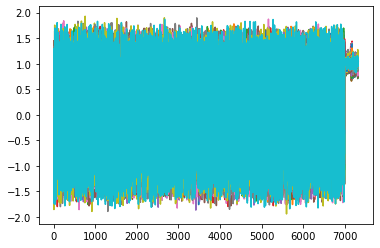

In [12]:
plt.plot(train)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb57f4a6310>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb57f4a69d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb57f48efa0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb5683d80d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb5683d8430>,
 'means': []}

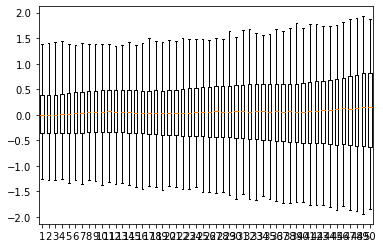

In [13]:
plt.boxplot(train)

**##############  Auto-Tune (does not work)  ##############**

## Split the Datasets in Training and Test Set
- We have chosen the 80% - 20% proportion for the initial split
- We reshape the datasets to feed them

In [14]:
X_tr, X_te, y_tr, y_te = train_test_split(train, targets, test_size=0.2,train_size=0.8)

NameError: name 'targets' is not defined

In [15]:
X = train.values.reshape(7326,50,1)
y = targets.values.reshape(7326,1,1)
test = test.values.reshape(3141,50,1)
type(X)

NameError: name 'targets' is not defined

In [6]:
X_tr = X_tr.values.reshape(5860,50,1)
y_tr = y_tr.values.reshape(5860,1,1)
X_te = X_te.values.reshape(1466,50,1)
y_te = y_te.values.reshape(1466,1,1)

X_tr_sh, y_tr_sh = shuffle(X_tr, y_tr)
X_te_sh, y_te_sh = shuffle(X_te, y_te)

In [7]:
def build_model(hp):
    model = Sequential()
    
    model.add(LSTM(units=hp.Int('units',
                                        min_value=20,
                                        max_value=40,
                                        step=2),
                           return_sequences = True, input_shape = (X_tr.shape[1], 1)))
    model.add(Dropout(0.5))
    
    model.add(LSTM(units=hp.Int('units',
                                        min_value=4,
                                        max_value=16,
                                        step=2),
                           return_sequences = True))
    model.add(Dropout(0.3))
    
    model.add(LSTM(units=hp.Int('units',
                                        min_value=2,
                                        max_value=8,
                                        step=2),
                           ))
    model.add(Dropout(0.2))

    model.add(Dense(units = 1))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-1, 1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error',
        metrics=['mean_squared_error'])
    return model

In [8]:
tuner = kt.Hyperband(
    build_model,
    objective='val_mean_squared_error',
    max_epochs=50,
    hyperband_iterations=2,
    directory='Megaus')

In [9]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 40, 'step': 2, 'sampling': None}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}


In [10]:
tuner.search(X_tr_sh,y_tr_sh,
             epochs=5,
             validation_data=(X_te_sh,y_te_sh))

Trial 59 Complete [00h 01m 43s]
val_mean_squared_error: 0.08281482756137848

Best val_mean_squared_error So Far: 0.01916494593024254
Total elapsed time: 01h 07m 23s
INFO:tensorflow:Oracle triggered exit


**##############  Build Regressor  ##############**

In [11]:
best = tuner.get_best_models(num_models=1)[0]

In [12]:
best.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 50, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'lstm_input'}},
  {'class_name': 'LSTM',
   'config': {'name': 'lstm',
    'trainable': True,
    'batch_input_shape': (None, 50, 1),
    'dtype': 'float32',
    'return_sequences': True,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 22,
    'activation': 'tanh',
    'recurrent_activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'unit_forget_bias': True,
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activ

In [14]:
regressor = Sequential()
regressor.add(LSTM(units = 30, return_sequences = True, input_shape = (X_tr.shape[1], 1)))
regressor.add(Dropout(0.5))
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 5))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

**##############  Fit Regressor  ##############**

In [14]:
best.fit(X, y, epochs = 50, batch_size = 16)

Epoch 1/50
458/458 [==============================] - 16s 35ms/step - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 2/50
458/458 [==============================] - 15s 32ms/step - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 3/50
458/458 [==============================] - 15s 33ms/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 4/50
426/458 [==========================>...] - ETA: 1s - loss: 0.0315 - mean_squared_error: 0.0315

KeyboardInterrupt: 

**##############  Test Predictions  ##############**

In [21]:
y_pred = best.predict(test)

**##############  Save File  ##############**

In [22]:
np.savetxt('RNNautotuned.txt', np.c_[y_pred])